In [1]:
# Craig Fox
print('Name: Craig Fox')
# TUID: 915781095
print('TUID: 915781095')

import networkx as nx
import pymnet as pmnt
import matplotlib.pyplot as plt
import csv
import collections
from itertools import combinations
from statistics import mean

Name: Craig Fox
TUID: 915781095


Problem 1


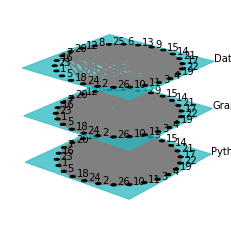

In [2]:
# Problem 1
print('Problem 1')

mnet = pmnt.MultiplexNetwork(couplings="none")
mnet.add_layer('Data Mining')
mnet.add_layer('Python')
mnet.add_layer('Graphs')

data_mining = list()
python = list()
graphs = list()

with open('data_file.csv', newline='') as csvfile:
    data_file = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(data_file) # Removes header
    for row in data_file:
        person = row[1]
        mnet.add_node(person[8:])
        if row[2] == 'Yes':
            data_mining.append(person[8:])
        if row[3] == 'Yes':
            python.append(person[8:])
        if row[4] == 'Yes':
            graphs.append(person[8:])

for x in list(combinations(data_mining, 2)):
    mnet[x[0], x[1], 'Data Mining', 'Data Mining'] = 1
for x in list(combinations(python, 2)):
    mnet[x[0], x[1], 'Python', 'Python'] = 1
for x in list(combinations(graphs, 2)):
    mnet[x[0], x[1], 'Graphs', 'Graphs'] = 1

fig = pmnt.draw(mnet, layout='circular', autoscale=True, show=True)
fig.savefig("Problem 1.png")

Problem 2


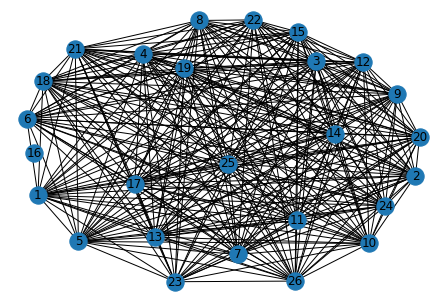

In [3]:
# Problem 2
print('Problem 2')

G = nx.Graph()

data_mining = list()
python = list()
graphs = list()

with open('data_file.csv', newline='') as csvfile:
    data_file = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(data_file) # Removes header
    for row in data_file:
        person = row[1]
        G.add_node(person[8:])
        if row[2] == 'Yes':
            data_mining.append(person[8:])
        if row[3] == 'Yes':
            python.append(person[8:])
        if row[4] == 'Yes':
            graphs.append(person[8:])


for x in list(combinations(data_mining, 2)):
    if G.has_edge(x[0], x[1]):
        G.add_edge(x[0], x[1], weight=G[x[0]][x[1]]['weight']+1)
    else:
        G.add_edge(x[0], x[1], weight=1)
for x in list(combinations(python, 2)):
    if G.has_edge(x[0], x[1]):
        G.add_edge(x[0], x[1], weight=G[x[0]][x[1]]['weight']+1)
    else:
        G.add_edge(x[0], x[1], weight=1)
for x in list(combinations(graphs, 2)):
    if G.has_edge(x[0], x[1]):
        G.add_edge(x[0], x[1], weight=G[x[0]][x[1]]['weight']+1)
    else:
        G.add_edge(x[0], x[1], weight=1)
pos = nx.spring_layout(G, k=5)
nx.draw(G, with_labels=True, pos=pos)
plt.savefig('Problem 2.png')
plt.show()

Problem 3


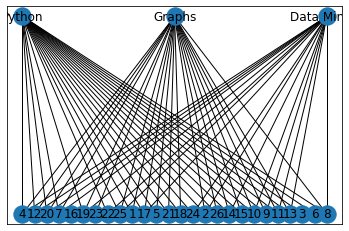

In [4]:
# Problem 3
print('Problem 3')

G = nx.Graph()

data_mining = list()
python = list()
graphs = list()

with open('data_file.csv', newline='') as csvfile:
    data_file = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(data_file) # Removes header
    for row in data_file:
        person = row[1]
        G.add_node(person[8:], bipartite=0)
        if row[2] == 'Yes':
            data_mining.append(person[8:])
        if row[3] == 'Yes':
            python.append(person[8:])
        if row[4] == 'Yes':
            graphs.append(person[8:])

classes = ['Data Mining', 'Python', 'Graphs']
G.add_nodes_from(classes, bipartite=1)
for x in data_mining:
    G.add_edge(x, 'Data Mining')
#G.add_node('Python', bipartite=1)
for x in python:
    G.add_edge(x, 'Python')
#G.add_node('Graphs', bipartite=1)
for x in graphs:
    G.add_edge(x, 'Graphs')
#nx.draw(G)
nx.draw_networkx(
    G,
    pos = nx.drawing.layout.bipartite_layout(G, classes, align='horizontal'))
plt.savefig('Problem 3.png')
plt.show()

In [5]:
# Problem 4
print('Problem 4')

data_mining_G = nx.Graph()
python_G = nx.Graph()
graphs_G = nx.Graph()

data_mining = list()
python = list()
graphs = list()

with open('data_file.csv', newline='') as csvfile:
    data_file = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(data_file) # Removes header
    for row in data_file:
        person = row[1]
        data_mining_G.add_node(person[8:])
        python_G.add_node(person[8:])
        graphs_G.add_node(person[8:])
        if row[2] == 'Yes':
            data_mining.append(person[8:])
        if row[3] == 'Yes':
            python.append(person[8:])
        if row[4] == 'Yes':
            graphs.append(person[8:])

for x in list(combinations(data_mining, 2)):
    data_mining_G.add_edge(x[0], x[1])
for x in list(combinations(python, 2)):
    python_G.add_edge(x[0], x[1])
for x in list(combinations(graphs, 2)):
    graphs_G.add_edge(x[0], x[1])

# Properties of Problem 1
print('\nProperties of Problem 1')
# Size and Diameter of the network largest connected component
data_mining_lcc = max(nx.connected_components(data_mining_G), key=len)
print('The size of the largest connected component on the Data Mining Layer is ' + str(len(data_mining_lcc)))
python_lcc = max(nx.connected_components(python_G), key=len)
print('The size of the largest connected component on the Python Layer is ' + str(len(python_lcc)))
graphs_lcc = max(nx.connected_components(graphs_G), key=len)
print('The size of the largest connected component on the Graphs Layer is ' + str(len(graphs_lcc)))
# Degree Distribution
print('On the Data Mining Layer, there are 16 nodes with a degree of 15 and 13 nodes with a degree 0')
print(collections.Counter([d for n, d in data_mining_G.degree()]))
print('On the Python Layer, there are 24 nodes with a degree of 23 and 2 nodes with a degree 0')
print(collections.Counter([d for n, d in python_G.degree()]))
print('On the Graphs Layer, there are 21 nodes with a degree of 20 and 5 nodes with a degree 0')
print(collections.Counter([d for n, d in graphs_G.degree()]))
# Average Path Length
print('There is no average shortest path length because the whole graph is not connected')
print('Connected: ' + str(nx.is_connected(data_mining_G)))
print('There is no average shortest path length because the whole graph is not connected')
print('Connected: ' + str(nx.is_connected(python_G)))
print('There is no average shortest path length because the whole graph is not connected')
print('Connected: ' + str(nx.is_connected(graphs_G)))
# Clustering Coefficient
print('The clustering coefficient for the Data Mining Layer is ' + str(mean(nx.clustering(data_mining_G).values())))
print('The clustering coefficient for the Python Layer is ' + str(mean(nx.clustering(python_G).values())))
print('The clustering coefficient for the Graphs Layer is ' + str(mean(nx.clustering(graphs_G).values())))

# Properties of Problem 3
print('\nProperties of Problem 3')
# Size and Diameter of the network largest connected component
lcc = max(nx.connected_components(G), key=len)
print('The size of the largest connected component is ' + str(len(lcc)))
# Degree Distribution
print('There are 14 nodes with a degree of 3, 8 nodes with a degree of 2, 3 nodes with a degree of 1, 1 node with a degree of 0, 1 node with a degree of 16, 1 node with a degree of 21, and 1 node with a degree of 24')
print(collections.Counter([d for n, d in G.degree()]))
# Average Path Length
print('There is no average shortest path length because the whole graph is not connected')
print('Connected: ' + str(nx.is_connected(G)))
# Clustering Coefficient
print('The clustering coefficient is 0 because it is impossible to have a triangle in a bipartite graph')
print(nx.clustering(G))

Problem 4

Properties of Problem 1
The size of the largest connected component on the Data Mining Layer is 16
The size of the largest connected component on the Python Layer is 24
The size of the largest connected component on the Graphs Layer is 21
On the Data Mining Layer, there are 16 nodes with a degree of 15 and 13 nodes with a degree 0
Counter({15: 16, 0: 10})
On the Python Layer, there are 24 nodes with a degree of 23 and 2 nodes with a degree 0
Counter({23: 24, 0: 2})
On the Graphs Layer, there are 21 nodes with a degree of 20 and 5 nodes with a degree 0
Counter({20: 21, 0: 5})
There is no average shortest path length because the whole graph is not connected
Connected: False
There is no average shortest path length because the whole graph is not connected
Connected: False
There is no average shortest path length because the whole graph is not connected
Connected: False
The clustering coefficient for the Data Mining Layer is 0.6153846153846154
The clustering coefficient for the 